# Denetimsiz Öğrenme (Unsupervised Learning)
- K - Ortamalar (K-Means)
- Hiyerarşik Kümeleme Analizi (Hierarchical Clustering Analysis)
- Temel Bileşen Analizi (Principal Component Analysis)

### K - Ortalamalar
- Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmak.

<img src = "https://miro.medium.com/max/841/0*uJMVSV1wM5ZtOZhg.png">

Adım 1 : Küme sayısını belirlenir.

Adım 2 : Rastgele k merkez seçilir.

Adım 3: Her gözlem için k merkezlere uzaklıkları hesaplanır.

Adım 4: Her gözlem en yakın k merkeze yani küme atanır.

Adım 5: Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.

Adım 6: Bu işlem belirlenen bir iterasyon sayısı kadar tekrar edilir ve küme içi hata kareler topşamlarının toplamının minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.



In [1]:
# pip install yellowbrick
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)

df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [6]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)
df[0:5]


array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [7]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [8]:
kmeans.n_clusters

4

In [9]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [10]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [11]:
kmeans.inertia_

3.683456153585913

Optimum Küme Sayısının Belirlenmesi

In [12]:
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)


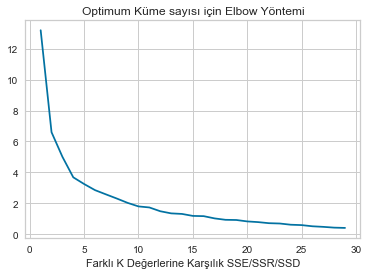

In [13]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

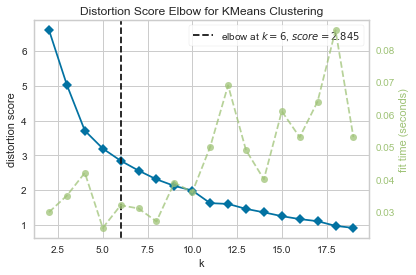

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [15]:
elbow.elbow_value_

6

Final Cluster'ların Oluşturulması

In [16]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [17]:
kmeans.n_clusters

6

In [18]:
kmeans.cluster_centers_

array([[0.54066265, 0.69777397, 0.72033898, 0.90826873],
       [0.37787514, 0.32627646, 0.49922958, 0.33168898],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.64834337, 0.77611301, 0.77118644, 0.56556848],
       [0.2560241 , 0.3140411 , 0.80169492, 0.26589147]])

In [19]:
kmeans.labels_

array([3, 0, 4, 1, 0, 0, 5, 5, 4, 3, 5, 2, 4, 1, 2, 1, 1, 3, 2, 4, 5, 4,
       2, 3, 1, 1, 1, 0, 2, 5, 4, 4, 3, 2, 5, 1, 1, 5, 5, 3, 2, 3, 4, 5,
       2, 1, 5, 2, 2, 1])

In [20]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [21]:
clusters_kmeans = kmeans.labels_

df = pd.read_csv("datasets/USArrests.csv", index_col=0)

df["cluster"] = clusters_kmeans

df.head()


,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0


In [22]:
df["cluster"] = df["cluster"] + 1

df[df["cluster"]==5]

,Murder,Assault,UrbanPop,Rape,cluster
Arizona,8.1,294,80,31.0,5
Florida,15.4,335,80,31.9,5
Illinois,10.4,249,83,24.0,5
Maryland,11.3,300,67,27.8,5
Michigan,12.1,255,74,35.1,5
New Mexico,11.4,285,70,32.1,5
New York,11.1,254,86,26.1,5
Texas,12.7,201,80,25.5,5


In [23]:
df.groupby("cluster").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1            4   9.775000   9.50       4  248.750000  257.5        4   
2           11   7.072727   6.80      11  140.272727  151.0       11   
3           10   2.680000   2.40      10   70.100000   64.5       10   
4            7  14.671429  14.40       7  251.285714  249.0        7   
5            8  11.562500  11.35       8  271.625000  270.0        8   
6           10   5.050000   4.85      10  136.700000  132.5       10   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        74.500000   79.5     4  42.450000  42.55  
2        61.454545   63.0    11  20.136364  19.50  
3        51.000000   52.5    10  10.910000  11.00  
4        54.285714   58.0     7  21.685714  22.20  
5        77.500000   80.0     8  29.187500  29.40  
6        79.300000   78.5    10  17.590000  17.55

In [24]:
df.to_csv("clusters.csv")

# Hiyerarşik Kümeleme Analizi (Hierarchical Clustering Analysis)
- Amaç gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmak.

<img src="https://www.veribilimiokulu.com/wp-content/uploads/2017/08/Kumeleme_Notlar%C4%B1_7_Hiyerarsik_Kumeleme_Python_Uygulama_Dendogram.png">



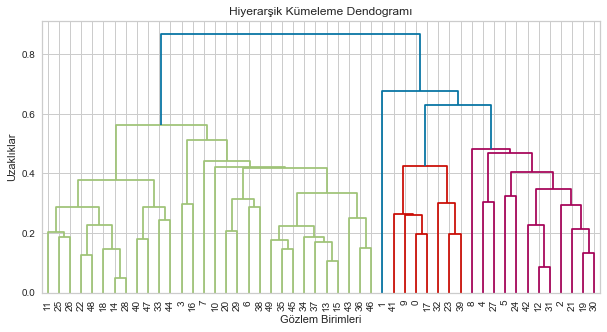

In [25]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)

sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

hc_average = linkage(df, "average")

plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()


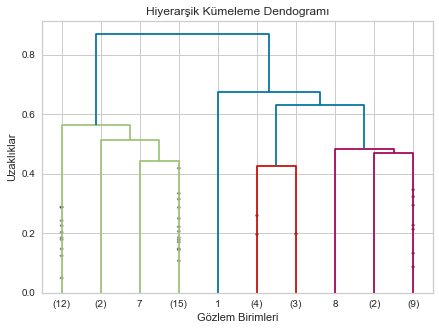

In [26]:
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()


Küme Sayısını Belirlemek

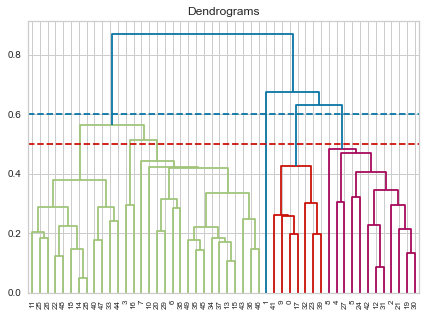

In [27]:

plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()


Final Modeli Oluşturmak

In [29]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

clusters = cluster.fit_predict(df)


In [31]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)
df["hi_cluster_no"] = clusters

df["hi_cluster_no"] = df["hi_cluster_no"] + 1



# Temel Bileşen Analizi ( Principal Component Analysis )
- Küçük miktarda bilgi kaybını göze alıp değişken boyutunu azaltmak.
<img src = "https://miro.medium.com/max/1400/1*rzNe0o3f1b0SGkj2PeL4PA.jpeg">

In [33]:
df = pd.read_csv("datasets/Hitters.csv")
df.head()

numCols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

df[numCols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [34]:
df = df[numCols]
df.dropna(inplace=True)
df.shape


(322, 16)

In [36]:
df = StandardScaler().fit_transform(df)

pca = PCA()
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_


array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

Optimum Bileşen Sayısı

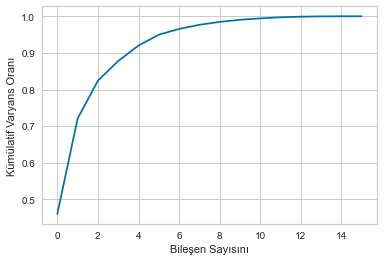

In [38]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

Final PCA'in Oluşturulması

In [40]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_


array([0.46037855, 0.26039849, 0.1033886 ])

In [41]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

BONUS: Principal Component Regression

In [42]:
df = pd.read_csv("datasets/Hitters.csv")
df.shape


(322, 20)

In [43]:
len(pca_fit)

322

In [44]:
numCols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(numCols)

16

In [45]:
others = [col for col in df.columns if col not in numCols]

pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]).head()

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [46]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


In [47]:
finalDf = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]),
                      df[others]], axis=1)
finalDf.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [49]:
for col in ["NewLeague", "Division", "League"]:
    label_encoder(finalDf, col)


In [50]:
finalDf.dropna(inplace=True)

In [51]:
y = finalDf["Salary"]
X = finalDf.drop(["Salary"], axis=1)

lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
y.mean()

535.9258821292775

In [52]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))

cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme

Breast Cancer

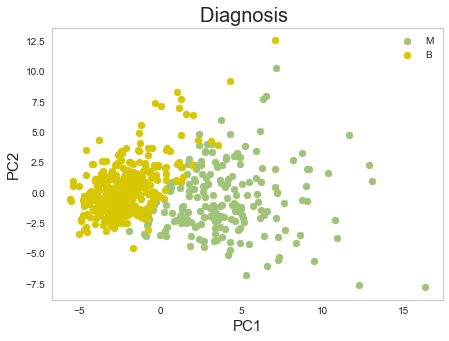

In [53]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

df = pd.read_csv("datasets/breast_cancer.csv")

y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)


def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)

def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")



Iris

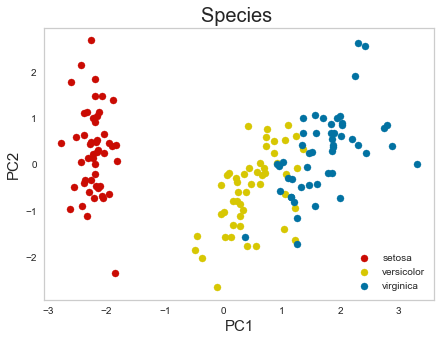

In [54]:
import seaborn as sns
df = sns.load_dataset("iris")

y = df["species"]
X = df.drop(["species"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "species")

Diabetes

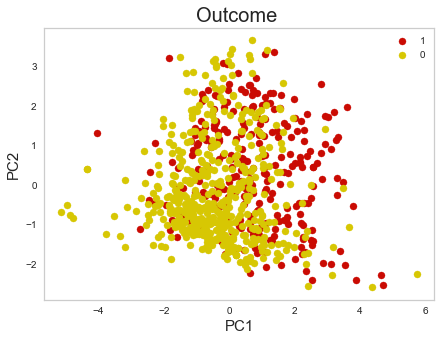

In [55]:
df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")
